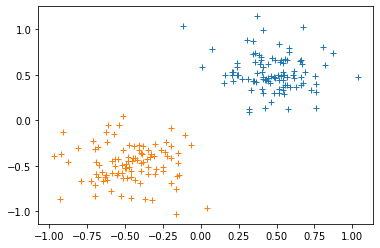

In [60]:
import numpy as np
import matplotlib.pyplot as plt
import time
import random

u1 = np.array([0.5,0.5])
conv1 = np.eye(2)/25
u2 = np.array([-0.5,-0.5])
conv2 = np.eye(2)/25

x1 = np.array(np.random.multivariate_normal(mean=u1,cov=conv1,size=100))
samp1, natt1 = x1.shape
a = np.ones(samp1)
x1 = np.insert(x1, natt1, values=a, axis=1)
plt.plot(x1[:,0],x1[:,1],'+')

x2 = np.array(np.random.multivariate_normal(mean=u2,cov=conv2,size=100))
samp2, natt2 = x2.shape
b = np.zeros(samp2)
x2 = np.insert(x2, natt2, values=b, axis=1)

x = np.vstack((x1,x2))
X = x[:,0:2]
samp3, natt3 = X.shape
c = np.ones(samp3)
X = np.insert(X, 0, values=c, axis=1)
y = x[:,2:]
plt.plot(x2[:,0],x2[:,1],'+')
plt.show()

In [0]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def loss_funtion(theta, X, y):
    g = X.dot(theta.T)
    h = sigmoid(g)
    m = y.size
    J = np.sum(-y.T.dot(np.log(h)) - (1-y).T.dot(np.log(1-h)))
    return J

def grad_descent(X,y,theta,alpha,itera):
    init_time = time.time()
    J_history=np.zeros(itera)
    m=y.size
    for i in np.arange(itera):
      J_history[i]=loss_funtion(theta,X,y)
      g=X.dot(theta.reshape(-1,1))
      h=sigmoid(g)
      G=((h-y).T).dot(X)
      theta=theta-alpha*G.flatten()
    return theta, J_history, (time.time() - init_time)/itera

In [0]:
def minibatch_gradient_descent(X,y,theta,learning_rate,iterations,batch_size):
  init_time = time.time()
  m = len(y)
  cost_history = np.zeros(iterations)
  n_batches = int(m/batch_size)
    
  for it in range(iterations):
    cost =0.0
    indices = np.random.permutation(m)
    X = X[indices]
    y = y[indices]
    for i in range(0,m,batch_size):
      X_i = X[i:i+batch_size]
      y_i = y[i:i+batch_size]  
      g=X_i.dot(theta.reshape(-1,1))
      h=sigmoid(g)
      G=((h-y_i).T).dot(X_i)
      theta=theta-(1/m)*learning_rate*G.flatten()     
      cost += loss_funtion(theta,X_i,y_i)
    cost_history[it]  = cost
        
  return theta,cost_history, (time.time() - init_time)/(iterations*m)


this is per interation of GD 6.355056166648864e-05
this is per interation of SGD 1.4870388805866242e-06


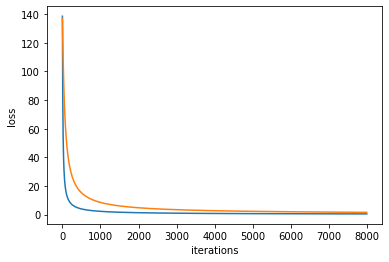

In [110]:
B = np.zeros(X.shape[1])
newB, cost_history, avg_time1 = grad_descent(X, y, B, alpha=0.002,itera=8000)
print('this is per interation of GD',avg_time1)
plt.plot(cost_history, label='GD')

al = np.zeros(X.shape[1])
newS, Scost_history, avg_time2 = minibatch_gradient_descent(X, y, al, learning_rate=0.08,iterations=8000,batch_size=30)
print('this is per interation of SGD',avg_time2)
plt.plot(Scost_history,label='SGD')
plt.xlabel('iterations')
plt.ylabel('loss')
plt.show()

In [0]:
def showLogRegres(newB, newS, X, y):
  
  fig, ax = plt.subplots()
  plt.plot(x1[:,0],x1[:,1],'+') 
  plt.plot(x2[:,0],x2[:,1],'+')   

  min_x = min(X[:,1])
  max_x = max(X[:,1])
  y_min_x = float(-newB[0] - newB[1] * min_x) / newB[2]
  y_max_x = float(-newB[0] - newB[1] * max_x) / newB[2]
  line1, = ax.plot([min_x, max_x], [y_min_x, y_max_x],'-',label = 'GD')


  min_x1 = min(X[:,1])
  max_x1 = max(X[:,1])
  y_min_x1 = float(-newS[0] - newS[1] * min_x1) / newS[2]
  y_max_x1 = float(-newS[0] - newS[1] * max_x1) / newS[2]
  line2, = ax.plot([min_x1, max_x1], [y_min_x1, y_max_x1],':', label = 'SGD')


  ax.legend(loc='upper right')
  #plt.text(0, 1, "  ", size = 15, alpha = 0.2)
  plt.show()

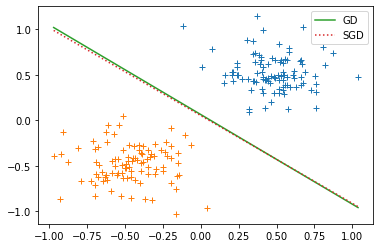

In [109]:
showLogRegres(newB, newS, X, y)